# Analyze Trades from PCM

In [2]:
#prepare packages and more 

#code completion, click tab after starting
%config IPCompleter.greedy=True 

import numpy as np
import pandas as pd

## Import Data
Import the LogHist tab from PCM-Tracking from Google Drive 

In [3]:
df = pd.read_excel('PCM-Tracking.xlsx', sheet_name='LogHist')
df.head()

,Date,Action,Contract,QtyChg,Price,Time,Unnamed: 6,Commission,Unnamed: 8,Cash Chg (PnL),...,FYend,DaysToFYEnd,FYEPSNxt,Growth*0.5to0.75,ROIC (Bw ROA ROE),Implied P/E,Years to Normalization,LastUpdated,Category,Comments.1
0,2012-05-24 00:00:00,NaN,start,NaN,NaN,NaN,NaN,NaN,NaN,140000.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,2012-05-24 00:00:00,NaN,watch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,2012-05-28 00:00:00,NaN,watch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,2012-05-29 00:00:00,NaN,watch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,2012-05-30 00:00:00,BOT,AIG,500.0,29.7,13:30:19,NaN,2.5,NaN,-14852.5,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [4]:
df.describe(include = 'all')

,Date,Action,Contract,QtyChg,Price,Time,Unnamed: 6,Commission,Unnamed: 8,Cash Chg (PnL),...,FYend,DaysToFYEnd,FYEPSNxt,Growth*0.5to0.75,ROIC (Bw ROA ROE),Implied P/E,Years to Normalization,LastUpdated,Category,Comments.1
count,11780,5923,11780,5846.000000,5961,6406,5485,5831.000000,2780,5841.000000,...,38,59.000000,59.000000,41.000000,26.000000,26.000000,26.000000,38,38,86
unique,1341,5,324,NaN,4899,5004,21,NaN,4,NaN,...,6,NaN,NaN,NaN,NaN,NaN,NaN,21,4,77
top,2019-10-12 00:00:00,SLD,watch,NaN,12mth macro,News sentiment contrary,USD,NaN,U1060261,NaN,...,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-12 00:00:00,Value,"coal, just like btu with poor gross margins bu..."
freq,73,3207,1062,NaN,115,121,5367,NaN,2175,NaN,...,19,NaN,NaN,NaN,NaN,NaN,NaN,7,19,4
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-10 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-24 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,1041.064831,NaN,NaN,NaN,5.035783,NaN,-67.661861,...,NaN,-42.188609,13.453629,0.260366,0.141538,21.541414,9.076923,NaN,NaN,NaN
std,NaN,NaN,NaN,1967.881324,NaN,NaN,NaN,9.148340,NaN,24712.072877,...,NaN,57.460229,31.727989,0.756562,0.081397,7.744338,6.254106,NaN,NaN,NaN
min,NaN,NaN,NaN,-26.000000,NaN,NaN,NaN,-3.690000,NaN,-211227.700000,...,NaN,-119.864445,0.000000,-0.030000,0.040000,2.999649,4.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,1.000000,NaN,-9819.500000,...,NaN,-118.773820,0.000000,0.030000,0.070000,14.788810,4.500000,NaN,NaN,NaN


In [5]:
# see what columsn there are
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11784 entries, 0 to 11783
Data columns (total 34 columns):
Date                                    11780 non-null object
Action                                  5923 non-null object
Contract                                11780 non-null object
QtyChg                                  5846 non-null float64
Price                                   5961 non-null object
Time                                    6406 non-null object
Unnamed: 6                              5485 non-null object
Commission                              5831 non-null float64
Unnamed: 8                              2780 non-null object
Cash Chg (PnL)                          5841 non-null float64
Comments                                6054 non-null object
PctReturn                               11 non-null float64
Details                                 0 non-null float64
StartDate                               92 non-null datetime64[ns]
Company Name (in alphabetical

In [6]:
# work with active trades with return first 
df_trades = df[df['Action'].notnull() & df['PctReturn'].notnull()]
print(df_trades.shape)
df_trades.head()

(11, 34)


,Date,Action,Contract,QtyChg,Price,Time,Unnamed: 6,Commission,Unnamed: 8,Cash Chg (PnL),...,FYend,DaysToFYEnd,FYEPSNxt,Growth*0.5to0.75,ROIC (Bw ROA ROE),Implied P/E,Years to Normalization,LastUpdated,Category,Comments.1
11550,2019-09-05 00:00:00,BOT,AAPL,100.0,213.17,15:08:49,USD,1.0,U1060261,-21318.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
11551,2019-09-05 00:00:00,BOT,MSFT,100.0,139.7,15:07:02,USD,1.0,U1060261,-13971.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
11559,2019-09-12 00:00:00,BOT,MSFT,100.0,137.87,2019-09-12 15:54:35,USD,1.0,U1060261,-13788.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
11563,2019-09-12 00:00:00,BOT,COST,100.0,289.57,2019-09-12 15:59:32,USD,1.0,U1060261,-28958.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
11569,2019-09-13 00:00:00,BOT,CI,150.0,161.82,2019-09-13 11:10:13,USD,1.0,U1060261,-24274.0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [7]:
# designate variables from trades
y_var = 'PctReturn'
X_var = ['% to Stop','% to Target', 'Growth*0.5to0.75']

#fill na with 0
df_trades = df_trades.fillna(0)

y = df_trades[y_var]
X = df_trades[X_var]

print('dependent variables')
print(y)
print("\nindepedent variables")
print(X)

dependent variables
11550    0.124877
11551   -0.015367
11559   -0.012621
11563    0.011252
11569    0.047584
11573   -0.041902
11575    0.016797
11577   -0.203342
11594   -0.037551
11727    0.046121
11728    0.084256
Name: PctReturn, dtype: float64

indepedent variables
       % to Stop  % to Target  Growth*0.5to0.75
11550   0.000000     0.000000              0.00
11551   0.000000     0.000000              0.00
11559   0.000000     0.000000              0.00
11563   0.000000     0.000000              0.00
11569   0.000000     0.000000              0.00
11573   0.000000     0.000000              0.00
11575   0.000000     0.000000              0.00
11577   0.000000     0.000000              0.00
11594   0.000000     0.000000              0.00
11727   0.620220    -0.762275              0.05
11728   0.760563    -0.779930              0.00


## Try GLM first

In [8]:
# glm packages
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# make train test split
X_train, X_test, y_train, y_test = train_test_split( \
    X, y, test_size=0.33, random_state=42)

# use ridge glm with builtin cross validation  
model_glm = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))

#fit model
model_glm.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [9]:
# see coef
print(model_glm.coef_)

[0. 0. 0.]


In [10]:
# evaluate model using R2, 1.0 is best value
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model_glm, X, y, cv=5, scoring='r2')

for data in cv_score:
    print('{:9.3f}'.format(data))

   -1.003
   -8.398
   -0.002
   -2.969
  -16.496


Since best R2 score is 1.0 and 0.0 is starting point, this model is substantially worse than normal

Text(0.5, 1.0, 'actual (x) vs predicted (y)')

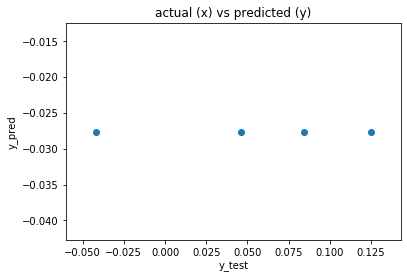

In [20]:
# predict
y_pred = model_glm.predict(X_test)

# actual vs predicted plot
import matplotlib.pyplot as plt
f, (ax0) = plt.subplots(1, 1, sharey=True)
ax0.scatter(y_test, y_pred)
ax0.set(xlabel='y_test', ylabel='y_pred')
ax0.set_title("actual (x) vs predicted (y)")

# # plot residuals
# from yellowbrick.datasets import load_concrete
# from yellowbrick.regressor import ResidualsPlot

# visualizer = ResidualsPlot(model_glm)

# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.show()                # Finalize and render the figure